In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns #datayı incelemeye yardımcı olan ayrı bir kütüphanedir.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data/pokemon.csv') #pokemon.csv datası dataframe'e çevrilir.

In [4]:
data.head() #dataframe'in ilk 5 satırı verildi.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


*   Bu dataframe 800 sample'dan oluşur.
*   12 columndan oluşmaktadır.
*   Columnların null olmayan veri sayıları ve bu verilerin türleri gözükmektedir.
*   Pandasta object string değerleri belirtmek için kullanılır.
*   Toplamda 1 column boolean, 8 column integer, 3 column string değer barındırır.
*   Boolean verileri True, False değerleridir.

# Correlation Map

*   Featurelar arasındaki ilişkiyi anlamaya yardımcı olur.
*  Eğer 2 tane feature arasında correlation 1 ise, bunlar birbiri ile doğru orantılıdır.
*  Korelasyon katsayısı -1 ile 1 arasında değerler alır.
*   Pozitif değerler direkt yönlü doğrusal ilişkiyi; negatif değerler ise ters yönlü bir doğrusal ilişkiyi belirtir.
*   Değişkenler birlikte artıyor veya azalıyorsa pozitif yönde, değişkenlerden biri artarken diğeri azalıyorsa ise negatif yönde bir ilişki vardır.
*  Korelasyon katsayısının 0'a yaklaşması değişkenler arasında zayıf ilişkinin varlığını gösterir.











In [6]:
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


#**SEABORN**
*   Bir görselleştirme kütüphanesidir.
*   istatiksel görselleştirmeler yapmak için kullanılır.
*   Verileri klasik formattan çıkararak anlamayı kolaylaştırır.






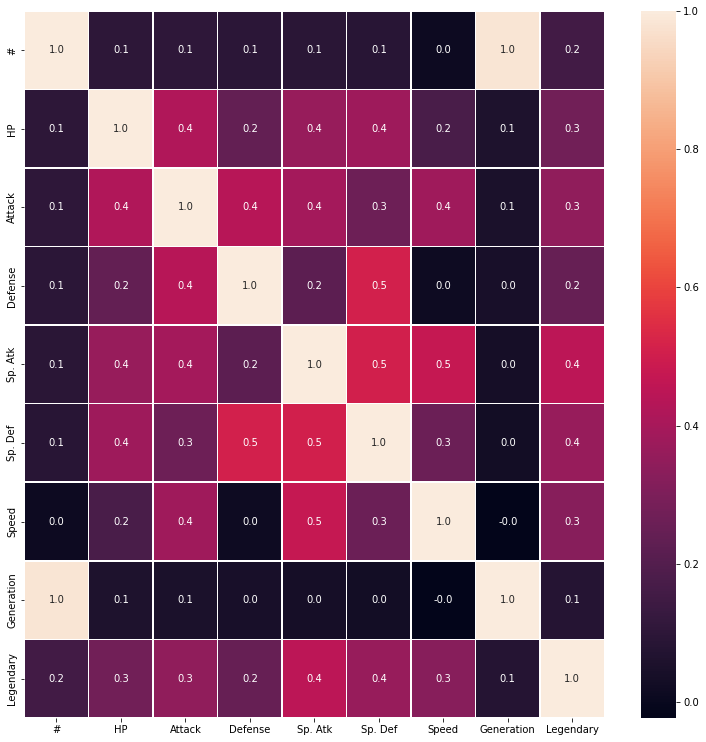

In [8]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Burada heatmap'in parametlerine baktığımızda;
*   data.corr() corelation map'i yazdırmak için kullanılır
*   **annot=True** Korelasyon katsayısını kutucukların üzerine yazılmasını sağlar.
*   **linewidths** her bir kutunun arasındaki mesafeyi belirlenir.
*   **fmt** ile virgülden sonra kaç basamak alınacağı belirlenir.
*   **ax** grafiğin hangi ara bölümde yer alacağını belirtir. Grafik tek bir bölmeden oluştuğu için ax = ax'tir.
*   **figsize** parametresi ile çerçevenin inç cinsinden genişlik ve yükseklik değerleri belirlenir. Eğer bir değer yazılmazsa default olarak belirlenir.

Bu corelation map'i incelediğimizde Speed ile Generation arasındaki ilişki -0.023121'dir. Generation ve Speed arasında herhangi bir ilişki olmadığından bu ilişkiye negatif yönlü kötü ilişki deriz.

In [9]:
data.head(10) #head methoduna bir değer yazılmazsa default olarak ilk 5 satır yazdırılır.
#İçerisine değer yazıp bu satır sayısını artırıp azaltabiliriz.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [10]:
data.columns #feature isimleri gösterilir.

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')